In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', 30) # показывать больше колонок

In [3]:
children = pd.read_csv('stud_math.csv')

In [4]:
children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Мы имеем хорошо заполненные данные, количество пустых значений не превышает 10%

# Предобработка

In [5]:
# функция заполнения числовых пропусков
def fillna_numbers(column):
    mean_column = round(children.loc[:, column].mean(), 0)
    children.loc[:, column] = children.loc[:, column].fillna(mean_column)


# функция перевода ответов "да/нет" в цифровой вид
def yes_no_function(column):
    children.loc[:, column] = children.loc[:, column].apply(
        lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)


# функция построения графика по типу boxplot
def get_boxplot(column):
    fig, axes = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=children,
                ax=axes)
    plt.xticks(rotation=45)
    axes.set_title('Boxplot for ' + column)
    plt.show()


# функция определения статически значимых различий
def get_stat_dif(column):
    cols = children.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(children.loc[children.loc[:, column] == comb[0], 'score'],
                     children.loc[children.loc[:, column] == comb[1], 'score']).pvalue \
                     <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Рассмотрим данные в стобцах

In [6]:
for col in children.columns:
    display(children.loc[:, col].value_counts())

GP    349
MS     46
Name: school, dtype: int64

F    208
M    187
Name: sex, dtype: int64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

U    295
R     83
Name: address, dtype: int64

GT3    261
LE3    107
Name: famsize, dtype: int64

T    314
A     36
Name: Pstatus, dtype: int64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

mother    250
father     86
other      28
Name: guardian, dtype: int64

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

no     335
yes     51
Name: schoolsup, dtype: int64

yes    219
no     137
Name: famsup, dtype: int64

no     200
yes    155
Name: paid, dtype: int64

yes    195
no     186
Name: activities, dtype: int64

yes    300
no      79
Name: nursery, dtype: int64

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

yes    356
no      19
Name: higher, dtype: int64

yes    305
no      56
Name: internet, dtype: int64

no     240
yes    124
Name: romantic, dtype: int64

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Визуальный просмотр данных показал, что данные практически полностью "чистые".
Неверно заполнено 1 значение в колонке Fedu и в колонке famrel. Удалим их.
Также отдельно рассмотрим absences и score на предмет выбросов.

In [7]:
children = children[(children.Fedu != 40.0) & (children.famrel != -1.0)]

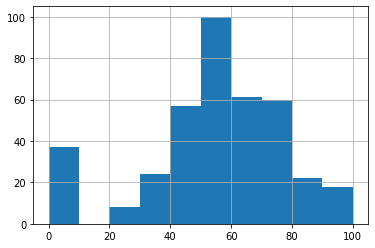

In [8]:
display(children.score.hist())

In [9]:
display(children[children.score == 0]['score'].count())

37

37 учеников имеют оценку по метематике "0". Просмотр остальных данных не приводит к мысле, что это прогульщики, "проблемные" дети абсолютно ничего непонимающие в математике. Наиболее вероятно, что данные ученики на данный момент не сдавали экзамен. Уберем данные этих учеников из датафрейма. 

In [10]:
children = children[children.score > 0]

In [11]:
IQR = children.score.quantile(0.75) - children.score.quantile(0.25)
perc25 = children.score.quantile(0.25)
perc75 = children.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      'IQR: {}, '.format(IQR), 'Границы выбросов: [{}, {}].'.format(perc25 - 1.5*IQR, perc75 + 1.5*IQR),
      '\nМинимальная оценка {}'.format(children.score.min()), '\nМаксимальная оценка {}'.format(children.score.max()))

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5]. 
Минимальная оценка 20.0 
Максимальная оценка 100.0


Выбросов не обнаружено

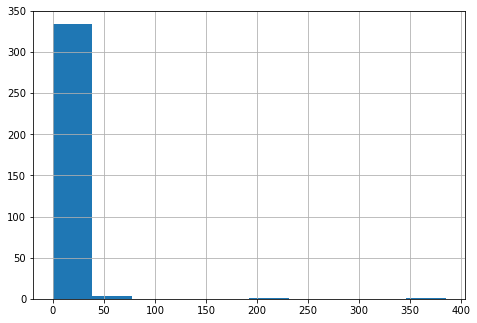

In [12]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0,350)
display(children.absences.hist())

Имеются аномальные значения

In [13]:
IQR = children.absences.quantile(0.75) - children.absences.quantile(0.25)
perc25 = children.absences.quantile(0.25)
perc75 = children.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      'IQR: {}, '.format(IQR),
      'Границы выбросов: [{}, {}].'.format(perc25 - 1.5*IQR, perc75 + 1.5*IQR),
      '\nМинимальное кол-во пропусков {}'.format(children.absences.min()),
      '\nМаксимальное кол-во пропусков {}'.format(children.absences.max()))

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0]. 
Минимальное кол-во пропусков 0.0 
Максимальное кол-во пропусков 385.0


In [14]:
display(children[children.absences > 17].absences.count())

27

Количество выбросов 27. Однако, если увеличить верхний предел на 5 пропущенных занятий, то количество выбросов уменьшиться в два раза, поэтому я предлагаю увеличить верхнюю границу.

In [15]:
children = children[children.absences < 23]

In [16]:
children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               327 non-null    object 
 1   sex                  327 non-null    object 
 2   age                  327 non-null    int64  
 3   address              314 non-null    object 
 4   famsize              307 non-null    object 
 5   Pstatus              293 non-null    object 
 6   Medu                 325 non-null    float64
 7   Fedu                 307 non-null    float64
 8   Mjob                 311 non-null    object 
 9   Fjob                 296 non-null    object 
 10  reason               312 non-null    object 
 11  guardian             299 non-null    object 
 12  traveltime           304 non-null    float64
 13  studytime            322 non-null    float64
 14  failures             309 non-null    float64
 15  schoolsup            318 non-null    obj

In [17]:
number_list = children.columns[children.dtypes == 'float64']

In [18]:
nonumber_list = children.columns[children.dtypes == 'object']

In [19]:
#заполнение пустых значений в колонках с численными данными
for col in number_list:
    fillna_numbers(col)

In [20]:
#для удобства анализа меняем значения колонках "да/нет" на 1, или 0
for col in nonumber_list[9:]:
    yes_no_function(col)

Рассмотрим корреляцию между числовыми параметрами

In [21]:
result_corr = children.corr()

In [22]:
display(result_corr)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.138181,-0.143410,0.111292,0.004350,0.216454,-0.242470,-0.137271,-0.039806,-0.116237,-0.135245,-0.004350,-0.200225,-0.103810,0.167506,0.050238,0.003340,0.124179,-0.062086,0.240463,-0.129444
Medu,-0.138181,1.000000,0.603657,-0.175486,0.076547,-0.202886,-0.054331,0.177932,0.144254,0.114198,0.164648,-0.076547,0.207353,0.209253,0.055108,-0.021327,0.005792,0.054727,-0.062311,0.068626,0.185308
Fedu,-0.143410,0.603657,1.000000,-0.153865,-0.021482,-0.273771,0.051374,0.209960,0.079886,0.089841,0.160512,0.021482,0.203856,0.155025,0.023622,-0.028224,-0.016555,0.034271,0.012013,-0.011144,0.124255
traveltime,0.111292,-0.175486,-0.153865,1.000000,-0.099973,0.096013,0.000166,-0.042669,-0.043219,0.001856,-0.048661,0.099973,-0.149226,-0.077198,0.050898,-0.043732,0.000681,0.028189,-0.006823,-0.025645,-0.077855
studytime,0.004350,0.076547,-0.021482,-0.099973,1.000000,-0.140355,-0.000475,0.144743,0.215360,0.088092,0.063487,-1.000000,0.138830,0.099737,0.062266,0.041095,-0.137276,-0.018379,-0.086873,-0.095555,0.142392
failures,0.216454,-0.202886,-0.273771,0.096013,-0.140355,1.000000,0.092422,-0.084432,-0.143935,-0.054500,-0.119673,0.140355,-0.346944,-0.100629,0.078666,0.018737,0.138051,0.131525,0.055015,0.167263,-0.287214
schoolsup,-0.242470,-0.054331,0.051374,0.000166,-0.000475,0.092422,1.000000,0.075045,-0.059967,0.062111,0.013461,0.000475,0.028640,-0.002903,-0.010949,0.014828,-0.055120,-0.023140,-0.045809,-0.018729,-0.261016
famsup,-0.137271,0.177932,0.209960,-0.042669,0.144743,-0.084432,0.075045,1.000000,0.294081,-0.007272,0.033415,-0.144743,0.107469,0.088033,-0.002820,-0.018456,0.031947,-0.030159,0.029538,0.021373,-0.036733
paid,-0.039806,0.144254,0.079886,-0.043219,0.215360,-0.143935,-0.059967,0.294081,1.000000,0.025873,0.103814,-0.215360,0.169502,0.186852,0.099309,-0.024479,-0.086572,0.015879,-0.077706,-0.090210,0.002175
activities,-0.116237,0.114198,0.089841,0.001856,0.088092,-0.054500,0.062111,-0.007272,0.025873,1.000000,-0.000218,-0.088092,0.007510,0.073271,-0.011762,0.073207,0.078557,0.029966,0.027693,0.008864,0.057725


На 100% скоррелированные величинами являются studytime, granular и studytime. Если посмотреть эти два столбца, то видно что значения studytime, granular это значения studytime умноженное на -3. Других практически полностью скоррелированных зависимостей не выявлено 

In [113]:
display(children[['studytime', 'studytime, granular']])

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
388,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [118]:
#удалим столбец studytime, granular
children.drop('studytime, granular', axis=1, inplace=True)

In [27]:
display(abs(result_corr.score).sort_values())

paid                   0.002175
freetime               0.021202
nursery                0.026543
famsup                 0.036733
romantic               0.042278
health                 0.055073
famrel                 0.057390
activities             0.057725
internet               0.068609
traveltime             0.077855
higher                 0.086541
Fedu                   0.124255
age                    0.129444
studytime, granular    0.142392
studytime              0.142392
Medu                   0.185308
goout                  0.205806
absences               0.233326
schoolsup              0.261016
failures               0.287214
score                  1.000000
Name: score, dtype: float64

Наибольшее влияние на количество баллов по математике оказывают следующие признаки - failures, schoolsup, absences, goout, Medu. Наименьшее влияние - paid, freetime, nursery, famsup, romantic.    

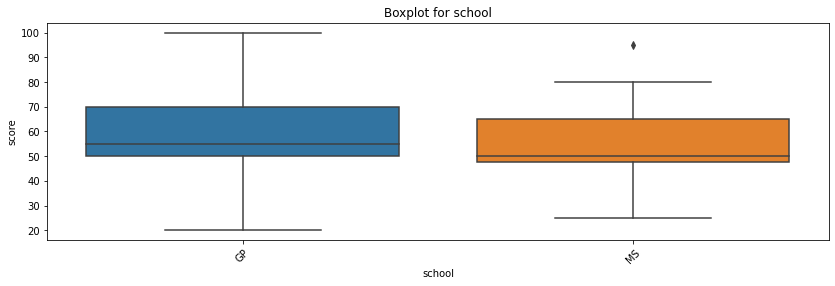

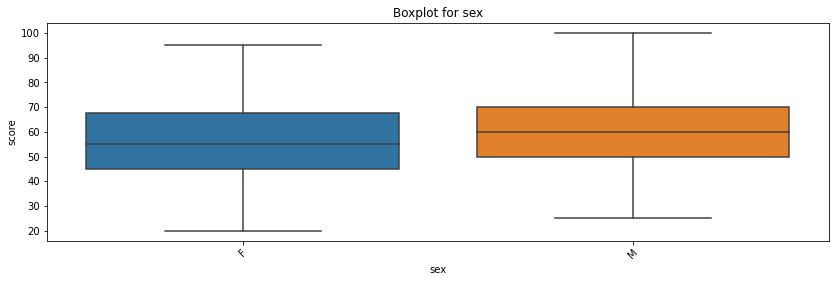

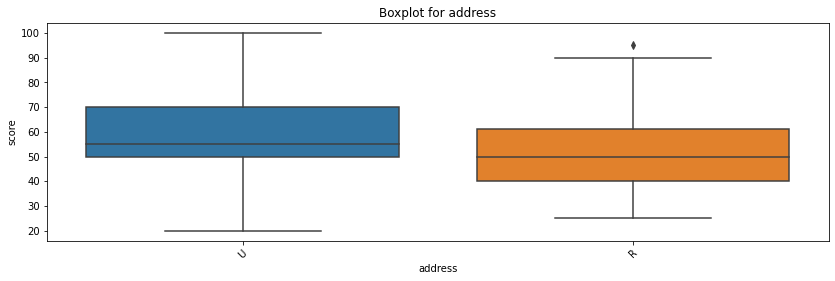

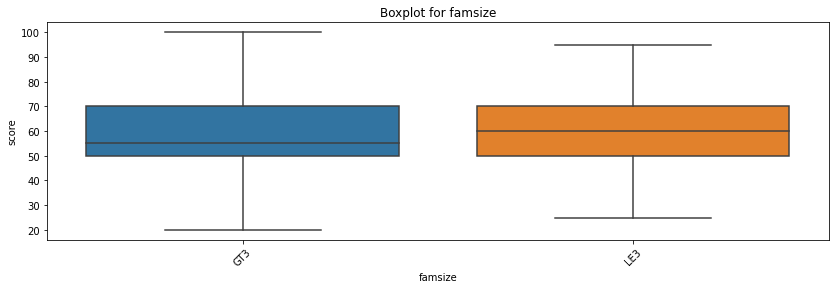

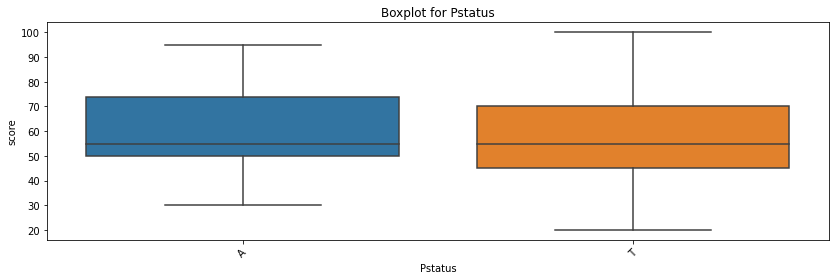

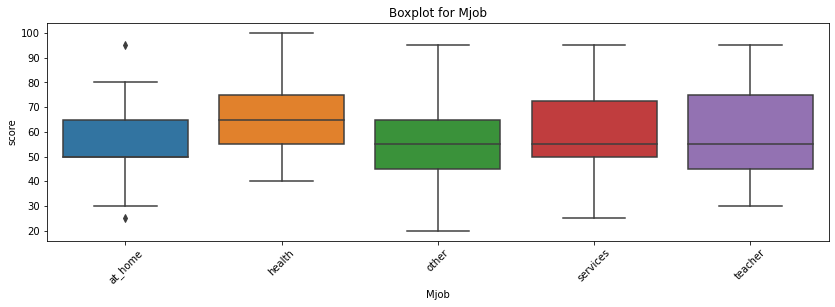

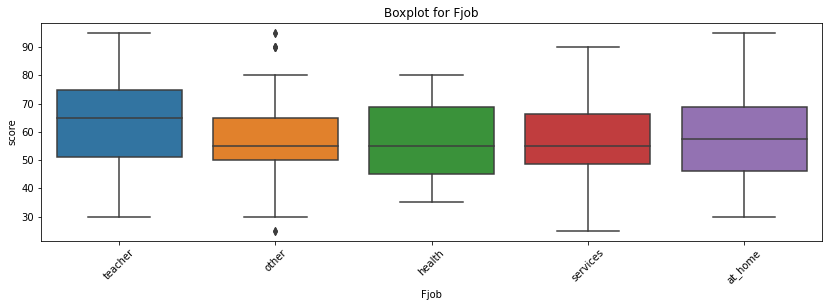

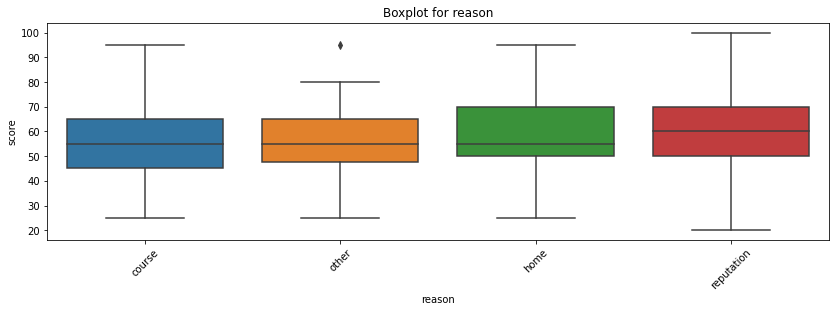

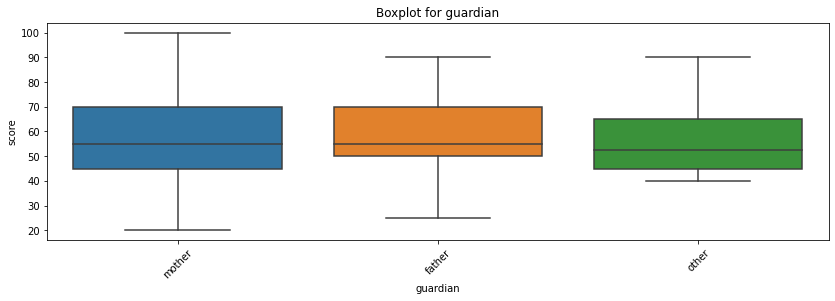

In [28]:
#строим графики
for col in nonumber_list[:9]:
    get_boxplot(col)

Предварительно кажется, что в наибольшей степени итоговый бал зависит от следующих признаков - Mjob, address.
Определить признаки, невлияющие на итоговую оценку, затруднительно. 
Проведем статистическую оценку для номинативных параметров, а также для численных параметров, имеющих дискретный набор значений - ("да/нет", от 1 до 5 и тд)

In [31]:
for col in nonumber_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Выполним подобное исследование с численными столбцами, за исключением absences и самособой scores

In [32]:
number_list = number_list.delete(5)
#мы удаляли один столбец (studytime, granular) из данных

In [33]:
for col in number_list[:-2]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


## Выводы

1) в данных мало отсутствующих значений (не более 10% в каждом из признаков)

2) данные практически чистые, малое количество выбросов. Исключение: 37 детей, которые по неизвестной причине, имеют нулевое количество балов

3) наиболее значимые параметры, которые предлагается в дальнейшем использовать в модели: address, Mjob, schoolsup, Medu, studytime, failures, goout, absences       

4) несколько удивительно, что дополнительные платные занятия по математике практически не оказывают эффекта на итоговую оценку по математике. Также интересным является влияние образования и работы матери, при этом такие же отцовские параметры не оказывают должного влияния